https://jupyter-notebook.readthedocs.io/en/stable/notebook.html

The 2 cells above this one describes how to connect to a database and save the result of your SQL query into a dataframe.
We will probably use this route soon but this time
I just saved the result of the SQL query into a csv file named WWImporters_101

In [1]:
# Put your imports in the same cell to organize them
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/DatasRev/source-files/master/csv/WWImporters_101.csv', delimiter=';') 

In [3]:
df.head(5)

,Sale Key,Region,Country,State Province,CustomerCategory,Customer,Brand,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
0,64113,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",NaN,White,"""The Gu"" red shirt XML tag t-shirt (White) 5XL",2014-01-20,2014-01-21,Hudson Onslow,Each,72,18.0,1296.0
1,90464,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",NaN,Black,"""The Gu"" red shirt XML tag t-shirt (Black) 6XL",2014-06-13,2014-06-14,Sophia Hinton,Each,120,18.0,2160.0
2,57138,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",NaN,White,"""The Gu"" red shirt XML tag t-shirt (White) 6XL",2013-12-06,2013-12-07,Hudson Hollinworth,Each,84,18.0,1512.0
3,54618,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",NaN,Gray,USB rocket launcher (Gray),2013-11-21,2013-11-22,Hudson Onslow,Each,1,25.0,25.0
4,57451,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",NaN,NaN,Small 9mm replacement blades 9mm,2013-12-09,2013-12-10,Lily Code,Each,40,4.1,164.0


In [4]:
df.head().style.highlight_null('yellow')

,Sale Key,Region,Country,State Province,CustomerCategory,Customer,Brand,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
0,64113,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",nan,White,"""The Gu"" red shirt XML tag t-shirt (White) 5XL",2014-01-20,2014-01-21,Hudson Onslow,Each,72,18,1296
1,90464,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",nan,Black,"""The Gu"" red shirt XML tag t-shirt (Black) 6XL",2014-06-13,2014-06-14,Sophia Hinton,Each,120,18,2160
2,57138,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",nan,White,"""The Gu"" red shirt XML tag t-shirt (White) 6XL",2013-12-06,2013-12-07,Hudson Hollinworth,Each,84,18,1512
3,54618,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",nan,Gray,USB rocket launcher (Gray),2013-11-21,2013-11-22,Hudson Onslow,Each,1,25,25
4,57451,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",nan,nan,Small 9mm replacement blades 9mm,2013-12-09,2013-12-10,Lily Code,Each,40,4.1,164


In [5]:
len(df)

2000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
Sale Key            2000 non-null int64
Region              2000 non-null object
Country             2000 non-null object
State Province      2000 non-null object
CustomerCategory    1164 non-null object
Customer            2000 non-null object
Brand               168 non-null object
Color               1196 non-null object
Product             2000 non-null object
InvoiceDate         2000 non-null object
DeliveryDate        1997 non-null object
SalesPerson         2000 non-null object
Package             2000 non-null object
Quantity            2000 non-null int64
Unit Price          2000 non-null float64
Sales               2000 non-null float64
dtypes: float64(2), int64(2), object(12)
memory usage: 250.1+ KB


In [7]:
df.columns.values

array(['Sale Key', 'Region', 'Country', 'State Province',
       'CustomerCategory', 'Customer', 'Brand', 'Color', 'Product',
       'InvoiceDate', 'DeliveryDate', 'SalesPerson', 'Package',
       'Quantity', 'Unit Price', 'Sales'], dtype=object)

In [8]:
columns=list(df)
columns

['Sale Key',
 'Region',
 'Country',
 'State Province',
 'CustomerCategory',
 'Customer',
 'Brand',
 'Color',
 'Product',
 'InvoiceDate',
 'DeliveryDate',
 'SalesPerson',
 'Package',
 'Quantity',
 'Unit Price',
 'Sales']

In [9]:
df.dtypes

Sale Key              int64
Region               object
Country              object
State Province       object
CustomerCategory     object
Customer             object
Brand                object
Color                object
Product              object
InvoiceDate          object
DeliveryDate         object
SalesPerson          object
Package              object
Quantity              int64
Unit Price          float64
Sales               float64
dtype: object

In [10]:
# Show memory used by each column
df.memory_usage(deep=True)

Index                   80
Sale Key             16000
Region              130000
Country             140000
State Province      134356
CustomerCategory    107068
Customer            153080
Brand                69712
Color                99738
Product             199006
InvoiceDate         134000
DeliveryDate        133895
SalesPerson         138521
Package             122080
Quantity             16000
Unit Price           16000
Sales                16000
dtype: int64

In [11]:
df[columns[1]] = df[columns[1]].astype('category')
df[columns[2]] = df[columns[2]].astype('category')
df[columns[3]] = df[columns[3]].astype('category')
df[columns[4]] = df[columns[4]].astype('category')
df[['Package']] = df[['Package']].astype('category')
df[columns[6]] = df[columns[6]].astype('category')
df[columns[7]] = df[columns[7]].astype('category')
df[columns[9]] = df[columns[9]].astype('datetime64[ns]')
df[columns[10]] = df[columns[10]].astype('datetime64[ns]')
df[columns[13]] = df[columns[13]].astype('float64')
df[columns[14]] = df[columns[14]].astype('float64')
df[columns[15]] = df[columns[15]].astype('float64')

In [12]:
df.set_index('Sale Key', drop=False, inplace=True) ## with the drop/False argument the Index col stays among the cols.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 64113 to 13332
Data columns (total 16 columns):
Sale Key            2000 non-null int64
Region              2000 non-null category
Country             2000 non-null category
State Province      2000 non-null category
CustomerCategory    1164 non-null category
Customer            2000 non-null object
Brand               168 non-null category
Color               1196 non-null category
Product             2000 non-null object
InvoiceDate         2000 non-null datetime64[ns]
DeliveryDate        1997 non-null datetime64[ns]
SalesPerson         2000 non-null object
Package             2000 non-null category
Quantity            2000 non-null float64
Unit Price          2000 non-null float64
Sales               2000 non-null float64
dtypes: category(7), datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 170.9+ KB


In [13]:
# The count method returns the number of non-missing values. By default, its axis parameter is set to 0:
df.count()

Sale Key            2000
Region              2000
Country             2000
State Province      2000
CustomerCategory    1164
Customer            2000
Brand                168
Color               1196
Product             2000
InvoiceDate         2000
DeliveryDate        1997
SalesPerson         2000
Package             2000
Quantity            2000
Unit Price          2000
Sales               2000
dtype: int64

In [14]:
df.isnull().sum()   # method chaining  summing the null values

Sale Key               0
Region                 0
Country                0
State Province         0
CustomerCategory     836
Customer               0
Brand               1832
Color                804
Product                0
InvoiceDate            0
DeliveryDate           3
SalesPerson            0
Package                0
Quantity               0
Unit Price             0
Sales                  0
dtype: int64

In [15]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 64113 to 13332
Data columns (total 16 columns):
Sale Key            2000 non-null int64
Region              2000 non-null category
Country             2000 non-null category
State Province      2000 non-null category
CustomerCategory    1164 non-null category
Customer            2000 non-null object
Brand               168 non-null category
Color               1196 non-null category
Product             2000 non-null object
InvoiceDate         2000 non-null datetime64[ns]
DeliveryDate        1997 non-null datetime64[ns]
SalesPerson         2000 non-null object
Package             2000 non-null category
Quantity            2000 non-null float64
Unit Price          2000 non-null float64
Sales               2000 non-null float64
dtypes: category(7), datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 604.1 KB


In [16]:
# Show memory used by each column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.memory_usage.html
df.memory_usage(deep=True)

Index                16000
Sale Key             16000
Region                2145
Country               2150
State Province        2279
CustomerCategory      2149
Customer            153080
Brand                 2146
Color                 2757
Product             199006
InvoiceDate          16000
DeliveryDate         16000
SalesPerson         138521
Package               2405
Quantity             16000
Unit Price           16000
Sales                16000
dtype: int64

In [17]:
df['Color'].hasnans    # we don't have nan or null values in this column

True

In [18]:
df.get_dtype_counts()

category          7
datetime64[ns]    2
float64           3
int64             1
object            3
dtype: int64

In [19]:
df.shape

(2000, 16)

In [20]:
df.describe()

,Sale Key,Quantity,Unit Price,Sales
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,81134.874000,39.826000,47.790170,797.835300
std,62048.293207,53.953389,155.021347,1495.596966
min,35.000000,1.000000,0.660000,9.600000
25%,31134.750000,5.000000,13.000000,100.000000
50%,65222.500000,10.000000,18.000000,240.000000
75%,118024.000000,70.000000,32.000000,960.000000
max,228187.000000,360.000000,1899.000000,18990.000000


In [21]:
df=df[df['Sales']>=10]     # filter dataset based on a boolean
df.describe()

,Sale Key,Quantity,Unit Price,Sales
count,1999.000000,1999.000000,1999.000000,1999.000000
mean,81064.385193,39.844922,47.811676,798.229615
std,61983.669580,53.960251,155.057152,1495.867201
min,35.000000,1.000000,0.660000,13.000000
25%,31134.500000,5.000000,13.000000,100.000000
50%,65222.000000,10.000000,18.000000,240.000000
75%,117873.500000,70.000000,32.000000,960.000000
max,228187.000000,360.000000,1899.000000,18990.000000


In [22]:
df.describe(include=[np.object])

,Customer,Product,SalesPerson
count,1999,1999,1999
unique,7,222,10
top,Unknown,"""The Gu"" red shirt XML tag t-shirt (White) 3XS",Archer Lamble
freq,836,19,228


In [23]:
df.describe(include=[np.number])

,Sale Key,Quantity,Unit Price,Sales
count,1999.000000,1999.000000,1999.000000,1999.000000
mean,81064.385193,39.844922,47.811676,798.229615
std,61983.669580,53.960251,155.057152,1495.867201
min,35.000000,1.000000,0.660000,13.000000
25%,31134.500000,5.000000,13.000000,100.000000
50%,65222.000000,10.000000,18.000000,240.000000
75%,117873.500000,70.000000,32.000000,960.000000
max,228187.000000,360.000000,1899.000000,18990.000000


In [24]:
df.select_dtypes(include=[np.number]).head()

,Sale Key,Quantity,Unit Price,Sales
Sale Key,,,,
64113,64113,72.0,18.0,1296.0
90464,90464,120.0,18.0,2160.0
57138,57138,84.0,18.0,1512.0
54618,54618,1.0,25.0,25.0
57451,57451,40.0,4.1,164.0


In [25]:
df.describe(include='all')

,Sale Key,Region,Country,State Province,CustomerCategory,Customer,Brand,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
count,1999.000000,1999,1999,1999,1163,1999,168,1196,1999,1999,1996,1999,1999,1999.000000,1999.000000,1999.000000
unique,NaN,1,1,3,1,7,1,7,222,443,442,10,4,NaN,NaN,NaN
top,NaN,Americas,United States,Pennsylvania,Novelty Shop,Unknown,Northwind,Black,"""The Gu"" red shirt XML tag t-shirt (White) 3XS",2013-03-06 00:00:00,2013-03-07 00:00:00,Archer Lamble,Each,NaN,NaN,NaN
freq,NaN,1999,1999,1089,1163,836,168,442,19,17,17,228,1923,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-01 00:00:00,2013-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-31 00:00:00,2016-05-29 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,81064.385193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.844922,47.811676,798.229615
std,61983.669580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.960251,155.057152,1495.867201
min,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.660000,13.000000
25%,31134.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,13.000000,100.000000


In [26]:
print (df.iloc[0]) # prints first line which is only useful if the index is sorted.

Sale Key                                                     64113
Region                                                    Americas
Country                                              United States
State Province                                        Pennsylvania
CustomerCategory                                      Novelty Shop
Customer                              Wingtip Toys (Rose Tree, PA)
Brand                                                          NaN
Color                                                        White
Product             "The Gu" red shirt XML tag t-shirt (White) 5XL
InvoiceDate                                    2014-01-20 00:00:00
DeliveryDate                                   2014-01-21 00:00:00
SalesPerson                                          Hudson Onslow
Package                                                       Each
Quantity                                                        72
Unit Price                                                    

In [27]:
df.sort_index(axis=0, inplace=True)
print (df.iloc[0]) # prints first line

Sale Key                                            35
Region                                        Americas
Country                                  United States
State Province                            Pennsylvania
CustomerCategory                          Novelty Shop
Customer                  Wingtip Toys (Rose Tree, PA)
Brand                                              NaN
Color                                             Blue
Product             Superhero action jacket (Blue) 3XL
InvoiceDate                        2013-01-01 00:00:00
DeliveryDate                       2013-01-02 00:00:00
SalesPerson                             Kayla Woodcock
Package                                           Each
Quantity                                             2
Unit Price                                          34
Sales                                               68
Name: 35, dtype: object


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 35 to 228187
Data columns (total 16 columns):
Sale Key            1999 non-null int64
Region              1999 non-null category
Country             1999 non-null category
State Province      1999 non-null category
CustomerCategory    1163 non-null category
Customer            1999 non-null object
Brand               168 non-null category
Color               1196 non-null category
Product             1999 non-null object
InvoiceDate         1999 non-null datetime64[ns]
DeliveryDate        1996 non-null datetime64[ns]
SalesPerson         1999 non-null object
Package             1999 non-null category
Quantity            1999 non-null float64
Unit Price          1999 non-null float64
Sales               1999 non-null float64
dtypes: category(7), datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 170.8+ KB


In [29]:
df.isnull().sum().head()    # isnull gives back 1 and we are summing the 1 values to get the null values.

Sale Key              0
Region                0
Country               0
State Province        0
CustomerCategory    836
dtype: int64

In [30]:
df['Package'].head(10)

Sale Key
35      Each
119     Each
584     Each
585     Each
674     Each
919     Each
920     Each
921     Each
984     Each
1199    Each
Name: Package, dtype: category
Categories (4, object): [Bag, Each, Packet, Pair]

In [31]:
df1 = df['Package']
df2 = df['Package']
df1 is df2
#The df1 and df2 variables are actually referring to the same object.
#Any change to one will change the other. Preventing this , you can use the copy method:
# The expression df['Package'] technically creates a view, and not a brand new copy.

True

In [32]:
df1 = df['Package'].copy()
df2 = df['Package'].copy()
df1 is df2

False

In [33]:
del df1
del df2

In [34]:
df.iloc[3:7,0:12]   # First slicing the index, then the columns

,Sale Key,Region,Country,State Province,CustomerCategory,Customer,Brand,Color,Product,InvoiceDate,DeliveryDate,SalesPerson
Sale Key,,,,,,,,,,,,
585,585,Americas,United States,Michigan,NaN,Unknown,NaN,NaN,USB food flash drive - hot dog,2013-01-04,2013-01-05,Taj Shand
674,674,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",NaN,Blue,Superhero action jacket (Blue) 3XL,2013-01-05,2013-01-06,Amy Trefl
919,919,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Stoneboro, PA)",NaN,White,DBA joke mug - two types of DBAs (White),2013-01-07,2013-01-08,Amy Trefl
920,920,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Stoneboro, PA)",NaN,NaN,Tape dispenser (Blue),2013-01-07,2013-01-08,Amy Trefl


In [35]:
df[df['Sales'] >1000].head(3)

,Sale Key,Region,Country,State Province,CustomerCategory,Customer,Brand,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
Sale Key,,,,,,,,,,,,,,,,
584,584,Americas,United States,Michigan,NaN,Unknown,NaN,NaN,Medium sized bubblewrap roll 20m,2013-01-04,2013-01-05,Taj Shand,Each,80.0,20.0,1600.0
920,920,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Stoneboro, PA)",NaN,NaN,Tape dispenser (Blue),2013-01-07,2013-01-08,Amy Trefl,Each,60.0,32.0,1920.0
984,984,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",NaN,NaN,20 mm Double sided bubble wrap 50m,2013-01-07,2013-01-08,Amy Trefl,Each,80.0,108.0,8640.0


In [36]:
'''Value_counts counts all the occurrences of each unique value:'''
df['Color'].value_counts()

Black          442
White          356
Blue           209
Gray            72
Red             51
Light Brown     35
Yellow          31
Name: Color, dtype: int64

In [37]:
df['Color'].value_counts(normalize=True)

Black          0.369565
White          0.297659
Blue           0.174749
Gray           0.060201
Red            0.042642
Light Brown    0.029264
Yellow         0.025920
Name: Color, dtype: float64

In [38]:
df['Country'].value_counts()   # So we only have 1 Country which makes it useless unless I want to plot it on a map.

United States    1999
Name: Country, dtype: int64

In [39]:
#Basic summary statistics
print(df['Sales'].min(), 'Min')
print(df['Sales'].max(), 'Max')
print(round(df['Sales'].mean(), 2), 'Mean')
print(df['Sales'].median(), 'Median')
print(df['Sales'].std(), 'Std')
print(df['Sales'].sum(), 'Sum')
print(df['Sales'].quantile(.50), '50th percentile') #median 50. precentile
print(df['InvoiceDate'].min(), 'Min')
print(df['InvoiceDate'].max(), 'Max')

13.0 Min
18990.0 Max
798.23 Mean
240.0 Median
1495.8672014914646 Std
1595661.0 Sum
240.0 50th percentile
2013-01-01 00:00:00 Min
2016-05-31 00:00:00 Max


In [40]:
df['Sales'].describe()

count     1999.000000
mean       798.229615
std       1495.867201
min         13.000000
25%        100.000000
50%        240.000000
75%        960.000000
max      18990.000000
Name: Sales, dtype: float64

In [41]:
df['InvoiceDate'].describe()

count                    1999
unique                    443
top       2013-03-06 00:00:00
freq                       17
first     2013-01-01 00:00:00
last      2016-05-31 00:00:00
Name: InvoiceDate, dtype: object

In [42]:
df['Brand'].value_counts()

Northwind    168
Name: Brand, dtype: int64

In [43]:
df['Brand'].hasnans 

True

In [44]:
df['Brand'].value_counts(dropna=False)

NaN          1831
Northwind     168
Name: Brand, dtype: int64

In [45]:
df['Brand'].value_counts(dropna=False, normalize=True)

NaN          0.915958
Northwind    0.084042
Name: Brand, dtype: float64

In [46]:
df.drop(['Brand'], axis=1, inplace=True)
df.head()

,Sale Key,Region,Country,State Province,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
Sale Key,,,,,,,,,,,,,,,
35,35,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-01,2013-01-02,Kayla Woodcock,Each,2.0,34.0,68.0
119,119,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Red,RC vintage American toy coupe with remote cont...,2013-01-02,2013-01-03,Kayla Woodcock,Each,6.0,30.0,180.0
584,584,Americas,United States,Michigan,NaN,Unknown,NaN,Medium sized bubblewrap roll 20m,2013-01-04,2013-01-05,Taj Shand,Each,80.0,20.0,1600.0
585,585,Americas,United States,Michigan,NaN,Unknown,NaN,USB food flash drive - hot dog,2013-01-04,2013-01-05,Taj Shand,Each,2.0,32.0,64.0
674,674,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-05,2013-01-06,Amy Trefl,Each,4.0,34.0,136.0


In [47]:
col_rename = {'State Province':'State'}   # renaming with a dictionary
df = df.rename(columns=col_rename)
df.head()

,Sale Key,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
Sale Key,,,,,,,,,,,,,,,
35,35,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-01,2013-01-02,Kayla Woodcock,Each,2.0,34.0,68.0
119,119,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Red,RC vintage American toy coupe with remote cont...,2013-01-02,2013-01-03,Kayla Woodcock,Each,6.0,30.0,180.0
584,584,Americas,United States,Michigan,NaN,Unknown,NaN,Medium sized bubblewrap roll 20m,2013-01-04,2013-01-05,Taj Shand,Each,80.0,20.0,1600.0
585,585,Americas,United States,Michigan,NaN,Unknown,NaN,USB food flash drive - hot dog,2013-01-04,2013-01-05,Taj Shand,Each,2.0,32.0,64.0
674,674,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-05,2013-01-06,Amy Trefl,Each,4.0,34.0,136.0


In [48]:
# The new columns is inserted into the last place of the columns
df['SalesCalc']=df['Quantity']*df['Unit Price']    

In [49]:
df.head()

,Sale Key,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales,SalesCalc
Sale Key,,,,,,,,,,,,,,,,
35,35,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-01,2013-01-02,Kayla Woodcock,Each,2.0,34.0,68.0,68.0
119,119,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Red,RC vintage American toy coupe with remote cont...,2013-01-02,2013-01-03,Kayla Woodcock,Each,6.0,30.0,180.0,180.0
584,584,Americas,United States,Michigan,NaN,Unknown,NaN,Medium sized bubblewrap roll 20m,2013-01-04,2013-01-05,Taj Shand,Each,80.0,20.0,1600.0,1600.0
585,585,Americas,United States,Michigan,NaN,Unknown,NaN,USB food flash drive - hot dog,2013-01-04,2013-01-05,Taj Shand,Each,2.0,32.0,64.0,64.0
674,674,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-05,2013-01-06,Amy Trefl,Each,4.0,34.0,136.0,136.0


In [50]:
df = df.drop('SalesCalc',axis='columns')
#or  del df['SalesCalc']
df.head()

,Sale Key,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
Sale Key,,,,,,,,,,,,,,,
35,35,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-01,2013-01-02,Kayla Woodcock,Each,2.0,34.0,68.0
119,119,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Red,RC vintage American toy coupe with remote cont...,2013-01-02,2013-01-03,Kayla Woodcock,Each,6.0,30.0,180.0
584,584,Americas,United States,Michigan,NaN,Unknown,NaN,Medium sized bubblewrap roll 20m,2013-01-04,2013-01-05,Taj Shand,Each,80.0,20.0,1600.0
585,585,Americas,United States,Michigan,NaN,Unknown,NaN,USB food flash drive - hot dog,2013-01-04,2013-01-05,Taj Shand,Each,2.0,32.0,64.0
674,674,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-05,2013-01-06,Amy Trefl,Each,4.0,34.0,136.0


In [51]:
# Okay, now let's insert the new column into a specific place among the columns
Salesindex = df.columns.get_loc('Package') + 1
print(Salesindex)
df.insert(loc=Salesindex, column='SalesCalc2', value=df['Quantity']*df['Unit Price'])
df.head()

12


,Sale Key,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,SalesCalc2,Quantity,Unit Price,Sales
Sale Key,,,,,,,,,,,,,,,,
35,35,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-01,2013-01-02,Kayla Woodcock,Each,68.0,2.0,34.0,68.0
119,119,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Red,RC vintage American toy coupe with remote cont...,2013-01-02,2013-01-03,Kayla Woodcock,Each,180.0,6.0,30.0,180.0
584,584,Americas,United States,Michigan,NaN,Unknown,NaN,Medium sized bubblewrap roll 20m,2013-01-04,2013-01-05,Taj Shand,Each,1600.0,80.0,20.0,1600.0
585,585,Americas,United States,Michigan,NaN,Unknown,NaN,USB food flash drive - hot dog,2013-01-04,2013-01-05,Taj Shand,Each,64.0,2.0,32.0,64.0
674,674,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-05,2013-01-06,Amy Trefl,Each,136.0,4.0,34.0,136.0


In [52]:
df = df.drop('SalesCalc2',axis='columns')

In [53]:
# so remember to use a list as the list of the columns you want to filter for!
df[['SalesPerson', 'Sales']].head(15)

,SalesPerson,Sales
Sale Key,,
35,Kayla Woodcock,68.0
119,Kayla Woodcock,180.0
584,Taj Shand,1600.0
585,Taj Shand,64.0
674,Amy Trefl,136.0
919,Amy Trefl,104.0
920,Amy Trefl,1920.0
921,Amy Trefl,340.0
984,Amy Trefl,8640.0


In [54]:
df.select_dtypes(include=['float64']).head()

,Quantity,Unit Price,Sales
Sale Key,,,
35,2.0,34.0,68.0
119,6.0,30.0,180.0
584,80.0,20.0,1600.0
585,2.0,32.0,64.0
674,4.0,34.0,136.0


In [55]:
df.select_dtypes(include=['number']).head()

,Sale Key,Quantity,Unit Price,Sales
Sale Key,,,,
35,35,2.0,34.0,68.0
119,119,6.0,30.0,180.0
584,584,80.0,20.0,1600.0
585,585,2.0,32.0,64.0
674,674,4.0,34.0,136.0


In [56]:
import numpy as np
print(np.nan == np.nan)

print(np.nan > 5)

print(5 > np.nan)

print(np.nan != 5)

False
False
False
True


In [57]:
# Use the nlargest method to select the top 100 movies by imdb_score:
df.nlargest(10, 'Sales').head()

,Sale Key,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
Sale Key,,,,,,,,,,,,,,,
31032,31032,Americas,United States,Michigan,Novelty Shop,"Tailspin Toys (Brown City, MI)",NaN,Air cushion machine (Blue),2013-07-03,2013-07-04,Hudson Onslow,Each,10.0,1899.0,18990.0
2423,2423,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Stoneboro, PA)",NaN,Air cushion machine (Blue),2013-01-15,2013-01-16,Hudson Onslow,Each,8.0,1899.0,15192.0
5536,5536,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",NaN,Air cushion machine (Blue),2013-02-02,2013-02-03,Jack Potter,Each,8.0,1899.0,15192.0
135487,135487,Americas,United States,Michigan,NaN,Unknown,NaN,Air cushion machine (Blue),2015-02-17,2015-02-18,Lily Code,Each,7.0,1899.0,13293.0
43942,43942,Americas,United States,Michigan,Novelty Shop,"Tailspin Toys (Brown City, MI)",NaN,Air cushion machine (Blue),2013-09-18,2013-09-19,Sophia Hinton,Each,6.0,1899.0,11394.0


In [58]:
df.nlargest(20, 'Sales').nsmallest(3, 'InvoiceDate')

,Sale Key,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
Sale Key,,,,,,,,,,,,,,,
2423,2423,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Stoneboro, PA)",NaN,Air cushion machine (Blue),2013-01-15,2013-01-16,Hudson Onslow,Each,8.0,1899.0,15192.0
5536,5536,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",NaN,Air cushion machine (Blue),2013-02-02,2013-02-03,Jack Potter,Each,8.0,1899.0,15192.0
7002,7002,Americas,United States,Pennsylvania,Novelty Shop,"Tailspin Toys (Tresckow, PA)",NaN,32 mm Double sided bubble wrap 50m,2013-02-14,2013-02-15,Hudson Onslow,Each,80.0,112.0,8960.0


In [59]:
# Selecting the largest of each group by sorting
df.sort_values('Sales', ascending=False).head(5)

,Sale Key,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
Sale Key,,,,,,,,,,,,,,,
31032,31032,Americas,United States,Michigan,Novelty Shop,"Tailspin Toys (Brown City, MI)",NaN,Air cushion machine (Blue),2013-07-03,2013-07-04,Hudson Onslow,Each,10.0,1899.0,18990.0
5536,5536,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",NaN,Air cushion machine (Blue),2013-02-02,2013-02-03,Jack Potter,Each,8.0,1899.0,15192.0
2423,2423,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Stoneboro, PA)",NaN,Air cushion machine (Blue),2013-01-15,2013-01-16,Hudson Onslow,Each,8.0,1899.0,15192.0
135487,135487,Americas,United States,Michigan,NaN,Unknown,NaN,Air cushion machine (Blue),2015-02-17,2015-02-18,Lily Code,Each,7.0,1899.0,13293.0
153971,153971,Americas,United States,Michigan,Novelty Shop,"Tailspin Toys (Brown City, MI)",NaN,Air cushion machine (Blue),2015-05-20,2015-05-21,Archer Lamble,Each,6.0,1899.0,11394.0


In [60]:
df.sort_values(['Quantity','Unit Price'], ascending=False).head(10)

,Sale Key,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
Sale Key,,,,,,,,,,,,,,,
5161,5161,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",NaN,Black and orange fragile despatch tape 48mmx75m,2013-01-31,2013-02-01,Sophia Hinton,Each,360.0,3.70,1332.0
82312,82312,Americas,United States,Michigan,Novelty Shop,"Tailspin Toys (Brown City, MI)",NaN,Black and orange fragile despatch tape 48mmx75m,2014-05-02,2014-05-03,Kayla Woodcock,Each,360.0,3.70,1332.0
74758,74758,Americas,United States,Pennsylvania,NaN,Unknown,NaN,Black and orange fragile despatch tape 48mmx75m,2014-03-21,2014-03-22,Sophia Hinton,Each,288.0,3.70,1065.6
87104,87104,Americas,United States,Pennsylvania,NaN,Unknown,NaN,Black and orange fragile despatch tape 48mmx75m,2014-05-29,2014-05-30,Kayla Woodcock,Each,288.0,3.70,1065.6
20835,20835,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",NaN,Clear packaging tape 48mmx75m,2013-05-08,2013-05-09,Lily Code,Each,260.0,2.90,754.0
69127,69127,Americas,United States,Pennsylvania,Novelty Shop,"Tailspin Toys (Tresckow, PA)",NaN,Clear packaging tape 48mmx75m,2014-02-17,2014-02-18,Taj Shand,Each,260.0,2.90,754.0
21752,21752,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Stoneboro, PA)",NaN,Shipping carton (Brown) 305x305x305mm,2013-05-13,2013-05-14,Taj Shand,Each,250.0,3.50,875.0
199115,199115,Americas,United States,Michigan,Novelty Shop,"Tailspin Toys (Brown City, MI)",NaN,Shipping carton (Brown) 305x305x305mm,2016-01-04,2016-01-05,Anthony Grosse,Each,250.0,3.50,875.0
16148,16148,Americas,United States,Pennsylvania,Novelty Shop,"Tailspin Toys (Tresckow, PA)",NaN,Shipping carton (Brown) 480x270x320mm,2013-04-11,2013-04-12,Sophia Hinton,Each,250.0,2.74,685.0


In [61]:
# Now, we use the drop_duplicates method to keep only the first row
df.sort_values('Sales', ascending=False).drop_duplicates(subset='SalesPerson').head()

,Sale Key,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
Sale Key,,,,,,,,,,,,,,,
31032,31032,Americas,United States,Michigan,Novelty Shop,"Tailspin Toys (Brown City, MI)",NaN,Air cushion machine (Blue),2013-07-03,2013-07-04,Hudson Onslow,Each,10.0,1899.0,18990.0
5536,5536,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",NaN,Air cushion machine (Blue),2013-02-02,2013-02-03,Jack Potter,Each,8.0,1899.0,15192.0
135487,135487,Americas,United States,Michigan,NaN,Unknown,NaN,Air cushion machine (Blue),2015-02-17,2015-02-18,Lily Code,Each,7.0,1899.0,13293.0
153971,153971,Americas,United States,Michigan,Novelty Shop,"Tailspin Toys (Brown City, MI)",NaN,Air cushion machine (Blue),2015-05-20,2015-05-21,Archer Lamble,Each,6.0,1899.0,11394.0
43942,43942,Americas,United States,Michigan,Novelty Shop,"Tailspin Toys (Brown City, MI)",NaN,Air cushion machine (Blue),2013-09-18,2013-09-19,Sophia Hinton,Each,6.0,1899.0,11394.0


In [62]:
# we can use sort_values with head again :
df.sort_values('DeliveryDate', ascending=False).head(10) \
.sort_values('Sales', ascending=True).head(3)

,Sale Key,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
Sale Key,,,,,,,,,,,,,,,
227725,227725,Americas,United States,Michigan,Novelty Shop,"Tailspin Toys (Brown City, MI)",Black,Developer joke mug - Oct 31 = Dec 25 (Black),2016-05-28,2016-05-29,Archer Lamble,Each,1.0,13.0,13.0
227726,227726,Americas,United States,Michigan,Novelty Shop,"Tailspin Toys (Brown City, MI)",White,DBA joke mug - SELECT caffeine FROM mug (White),2016-05-28,2016-05-29,Archer Lamble,Each,2.0,13.0,26.0
227723,227723,Americas,United States,Michigan,Novelty Shop,"Tailspin Toys (Brown City, MI)",NaN,Permanent marker black 5mm nib (Black) 5mm,2016-05-28,2016-05-29,Archer Lamble,Each,12.0,2.7,32.4


In [63]:
#Pass an integer to the .iloc indexer to select an entire row at that position:
df.loc[227725]

Sale Key                                                  227725
Region                                                  Americas
Country                                            United States
State                                                   Michigan
CustomerCategory                                    Novelty Shop
Customer                          Tailspin Toys (Brown City, MI)
Color                                                      Black
Product             Developer joke mug - Oct 31 = Dec 25 (Black)
InvoiceDate                                  2016-05-28 00:00:00
DeliveryDate                                 2016-05-29 00:00:00
SalesPerson                                        Archer Lamble
Package                                                     Each
Quantity                                                       1
Unit Price                                                    13
Sales                                                         13
Name: 227725, dtype: obje

In [64]:
#Specify the step size of the slice:
df.loc[35:227725:1000]

,Sale Key,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
Sale Key,,,,,,,,,,,,,,,
35,35,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-01,2013-01-02,Kayla Woodcock,Each,2.0,34.0,68.0
65223,65223,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",NaN,Small 9mm replacement blades 9mm,2014-01-24,2014-01-25,Hudson Hollinworth,Each,40.0,4.1,164.0


In [65]:
df.iloc[0]

Sale Key                                            35
Region                                        Americas
Country                                  United States
State                                     Pennsylvania
CustomerCategory                          Novelty Shop
Customer                  Wingtip Toys (Rose Tree, PA)
Color                                             Blue
Product             Superhero action jacket (Blue) 3XL
InvoiceDate                        2013-01-01 00:00:00
DeliveryDate                       2013-01-02 00:00:00
SalesPerson                             Kayla Woodcock
Package                                           Each
Quantity                                             2
Unit Price                                          34
Sales                                               68
Name: 35, dtype: object

In [66]:
#This returns a Series:
df.iloc[[10,20,30]]

,Sale Key,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
Sale Key,,,,,,,,,,,,,,,
1200,1200,Americas,United States,Michigan,NaN,Unknown,Red,Ride on toy sedan car (Red) 1/12 scale,2013-01-08,2013-01-09,Lily Code,Each,10.0,230.0,2300.0
2167,2167,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Shay, PA)",NaN,Red and white urgent heavy despatch tape 48m...,2013-01-14,2013-01-15,Kayla Woodcock,Each,24.0,4.1,98.4
3117,3117,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Gray,Halloween skull mask (Gray) L,2013-01-18,2013-01-19,Hudson Onslow,Each,120.0,18.0,2160.0


In [67]:
#Use slice notation:
df.iloc[2:40:5]

,Sale Key,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
Sale Key,,,,,,,,,,,,,,,
584,584,Americas,United States,Michigan,NaN,Unknown,NaN,Medium sized bubblewrap roll 20m,2013-01-04,2013-01-05,Taj Shand,Each,80.0,20.0,1600.0
921,921,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Stoneboro, PA)",Blue,Superhero action jacket (Blue) 4XL,2013-01-07,2013-01-08,Amy Trefl,Each,10.0,34.0,340.0
1202,1202,Americas,United States,Michigan,NaN,Unknown,White,DBA joke mug - you might be a DBA if (White),2013-01-08,2013-01-09,Lily Code,Each,6.0,13.0,78.0
1571,1571,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Stoneboro, PA)",Black,Developer joke mug - when your hammer is C++ (...,2013-01-10,2013-01-11,Taj Shand,Each,3.0,13.0,39.0
2169,2169,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Shay, PA)",White,DBA joke mug - two types of DBAs (White),2013-01-14,2013-01-15,Kayla Woodcock,Each,6.0,13.0,78.0
2422,2422,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Stoneboro, PA)",Light Brown,Halloween zombie mask (Light Brown) S,2013-01-15,2013-01-16,Hudson Onslow,Each,96.0,18.0,1728.0
3119,3119,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",White,"""The Gu"" red shirt XML tag t-shirt (White) S",2013-01-18,2013-01-19,Hudson Onslow,Each,12.0,18.0,216.0
3514,3514,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",NaN,20 mm Double sided bubble wrap 50m,2013-01-22,2013-01-23,Archer Lamble,Each,20.0,108.0,2160.0


In [68]:
df.loc[35:1000, 'Color':'Package']

,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package
Sale Key,,,,,,
35,Blue,Superhero action jacket (Blue) 3XL,2013-01-01,2013-01-02,Kayla Woodcock,Each
119,Red,RC vintage American toy coupe with remote cont...,2013-01-02,2013-01-03,Kayla Woodcock,Each
584,NaN,Medium sized bubblewrap roll 20m,2013-01-04,2013-01-05,Taj Shand,Each
585,NaN,USB food flash drive - hot dog,2013-01-04,2013-01-05,Taj Shand,Each
674,Blue,Superhero action jacket (Blue) 3XL,2013-01-05,2013-01-06,Amy Trefl,Each
919,White,DBA joke mug - two types of DBAs (White),2013-01-07,2013-01-08,Amy Trefl,Each
920,NaN,Tape dispenser (Blue),2013-01-07,2013-01-08,Amy Trefl,Each
921,Blue,Superhero action jacket (Blue) 4XL,2013-01-07,2013-01-08,Amy Trefl,Each
984,NaN,20 mm Double sided bubble wrap 50m,2013-01-07,2013-01-08,Amy Trefl,Each


In [69]:
df.iloc[0:100, [3,7]].head(3)

,State,Product
Sale Key,,
35,Pennsylvania,Superhero action jacket (Blue) 3XL
119,Pennsylvania,RC vintage American toy coupe with remote cont...
584,Michigan,Medium sized bubblewrap roll 20m


In [70]:
df['Sales'].sum()

1595661.0

In [71]:
df[ df['Sale Key']==35 ].Sales.sum()

68.0

In [72]:
df[ df['SalesPerson']=='Taj Shand' ].Sales.mean()

814.0988151658767

In [73]:
df['Unit Price'].gt(30).head() 

Sale Key
35      True
119    False
584    False
585     True
674     True
Name: Unit Price, dtype: bool

In [74]:
df['Unit Price'].gt(30).count()

1999

# Constructing multiple boolean conditions

In [75]:
criteria1 = df['CustomerCategory']=='Novelty Shop'
criteria2 = df['Quantity']>=270
criteria3 = ((df['State']=='Michigan') | (df['State']=='Pennsylvania'))

In [76]:
criteria_combined = criteria1 & criteria2 & criteria3
criteria_combined.head()

Sale Key
35     False
119    False
584    False
585    False
674    False
dtype: bool

In [77]:
df[ criteria_combined ].head()

,Sale Key,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
Sale Key,,,,,,,,,,,,,,,
5161,5161,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",NaN,Black and orange fragile despatch tape 48mmx75m,2013-01-31,2013-02-01,Sophia Hinton,Each,360.0,3.7,1332.0
82312,82312,Americas,United States,Michigan,Novelty Shop,"Tailspin Toys (Brown City, MI)",NaN,Black and orange fragile despatch tape 48mmx75m,2014-05-02,2014-05-03,Kayla Woodcock,Each,360.0,3.7,1332.0


In [78]:
SalesPersons = ['Sophia Hinton', 'Kayla Woodcock']
criteria4 =df['SalesPerson'].isin(SalesPersons)
criteria_combined_extended = criteria_combined | criteria4
df[ criteria_combined_extended ].head()

,Sale Key,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
Sale Key,,,,,,,,,,,,,,,
35,35,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-01,2013-01-02,Kayla Woodcock,Each,2.0,34.0,68.0
119,119,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Red,RC vintage American toy coupe with remote cont...,2013-01-02,2013-01-03,Kayla Woodcock,Each,6.0,30.0,180.0
1410,1410,Americas,United States,Pennsylvania,NaN,Unknown,Black,Bubblewrap dispenser (Black) 1.5m,2013-01-09,2013-01-10,Sophia Hinton,Each,6.0,240.0,1440.0
1411,1411,Americas,United States,Pennsylvania,NaN,Unknown,NaN,Dinosaur battery-powered slippers (Green) L,2013-01-09,2013-01-10,Sophia Hinton,Each,2.0,32.0,64.0
2166,2166,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Shay, PA)",White,Developer joke mug - this code was generated b...,2013-01-14,2013-01-15,Kayla Woodcock,Each,3.0,13.0,39.0


In [79]:
# Indexes should be unique or sorted to perform well.
df.index.is_monotonic_increasing   # return if the index is monotonic increasing (only equal or increasing) values.

True

In [80]:
df.index.is_unique

True

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 35 to 228187
Data columns (total 15 columns):
Sale Key            1999 non-null int64
Region              1999 non-null category
Country             1999 non-null category
State               1999 non-null category
CustomerCategory    1163 non-null category
Customer            1999 non-null object
Color               1196 non-null category
Product             1999 non-null object
InvoiceDate         1999 non-null datetime64[ns]
DeliveryDate        1996 non-null datetime64[ns]
SalesPerson         1999 non-null object
Package             1999 non-null category
Quantity            1999 non-null float64
Unit Price          1999 non-null float64
Sales               1999 non-null float64
dtypes: category(6), datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 248.8+ KB


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 35 to 228187
Data columns (total 15 columns):
Sale Key            1999 non-null int64
Region              1999 non-null category
Country             1999 non-null category
State               1999 non-null category
CustomerCategory    1163 non-null category
Customer            1999 non-null object
Color               1196 non-null category
Product             1999 non-null object
InvoiceDate         1999 non-null datetime64[ns]
DeliveryDate        1996 non-null datetime64[ns]
SalesPerson         1999 non-null object
Package             1999 non-null category
Quantity            1999 non-null float64
Unit Price          1999 non-null float64
Sales               1999 non-null float64
dtypes: category(6), datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 248.8+ KB


In [83]:
df.set_index('InvoiceDate', inplace=True, drop=False)

In [84]:
df.InvoiceDate.describe()

count                    1999
unique                    443
top       2013-03-06 00:00:00
freq                       17
first     2013-01-01 00:00:00
last      2016-05-31 00:00:00
Name: InvoiceDate, dtype: object

# Filtering with SQL Where clauses

In [85]:
df.set_index('Sale Key', inplace=True)
df.head()

,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
Sale Key,,,,,,,,,,,,,,
35,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-01,2013-01-02,Kayla Woodcock,Each,2.0,34.0,68.0
119,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Red,RC vintage American toy coupe with remote cont...,2013-01-02,2013-01-03,Kayla Woodcock,Each,6.0,30.0,180.0
584,Americas,United States,Michigan,NaN,Unknown,NaN,Medium sized bubblewrap roll 20m,2013-01-04,2013-01-05,Taj Shand,Each,80.0,20.0,1600.0
585,Americas,United States,Michigan,NaN,Unknown,NaN,USB food flash drive - hot dog,2013-01-04,2013-01-05,Taj Shand,Each,2.0,32.0,64.0
674,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-05,2013-01-06,Amy Trefl,Each,4.0,34.0,136.0


In [86]:
State = ['California', 'Pennsylvania', 'Michigan']
criteria_1 = df.State.isin(State)
criteria_2 = df.CustomerCategory == 'Novelty Shop'
criteria_3 = (df.Sales >= 10) & \
(df.Sales <= 180)
criteria_4=df.InvoiceDate>'2013-01-09'

In [87]:
criteria_final = (criteria_1 & criteria_2 & criteria_3  & criteria_4)

In [88]:
# Use boolean indexing to select only the rows that meet the final criteria:
select_columns = ['InvoiceDate','Color', 'State', 'Sales']
df.loc[criteria_final, select_columns].head(10)

,InvoiceDate,Color,State,Sales
Sale Key,,,,
1570,2013-01-10,Black,Pennsylvania,26.00
1571,2013-01-10,Black,Pennsylvania,39.00
1572,2013-01-10,NaN,Pennsylvania,47.25
2166,2013-01-14,White,Pennsylvania,39.00
2167,2013-01-14,NaN,Pennsylvania,98.40
2168,2013-01-14,Yellow,Pennsylvania,125.00
2169,2013-01-14,White,Pennsylvania,78.00
2179,2013-01-14,White,Pennsylvania,117.00
3120,2013-01-18,White,Pennsylvania,13.00


# Query method

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [89]:
qs = "State in @State and CustomerCategory == 'Novelty Shop'"
df_filtered2 = df.query(qs)
df_filtered2.head()

,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
Sale Key,,,,,,,,,,,,,,
35,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-01,2013-01-02,Kayla Woodcock,Each,2.0,34.0,68.0
119,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Red,RC vintage American toy coupe with remote cont...,2013-01-02,2013-01-03,Kayla Woodcock,Each,6.0,30.0,180.0
674,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-05,2013-01-06,Amy Trefl,Each,4.0,34.0,136.0
919,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Stoneboro, PA)",White,DBA joke mug - two types of DBAs (White),2013-01-07,2013-01-08,Amy Trefl,Each,8.0,13.0,104.0
920,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Stoneboro, PA)",NaN,Tape dispenser (Blue),2013-01-07,2013-01-08,Amy Trefl,Each,60.0,32.0,1920.0


# Where

The where method accepts a boolean condition. The default
behavior is to return a Series the same size as the original which has all the
False locations replaced with a missing value.

In [90]:
qs2= (df['Sales']>10)
df.where(qs2).head(5)


,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales
Sale Key,,,,,,,,,,,,,,
35,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-01,2013-01-02,Kayla Woodcock,Each,2.0,34.0,68.0
119,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Red,RC vintage American toy coupe with remote cont...,2013-01-02,2013-01-03,Kayla Woodcock,Each,6.0,30.0,180.0
584,Americas,United States,Michigan,NaN,Unknown,NaN,Medium sized bubblewrap roll 20m,2013-01-04,2013-01-05,Taj Shand,Each,80.0,20.0,1600.0
585,Americas,United States,Michigan,NaN,Unknown,NaN,USB food flash drive - hot dog,2013-01-04,2013-01-05,Taj Shand,Each,2.0,32.0,64.0
674,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-05,2013-01-06,Amy Trefl,Each,4.0,34.0,136.0


# Masking DataFrame rows

In [91]:
df['State'].mask(criteria_1).head(10)

Sale Key
35      NaN
119     NaN
584     NaN
585     NaN
674     NaN
919     NaN
920     NaN
921     NaN
984     NaN
1199    NaN
Name: State, dtype: category
Categories (3, object): [Michigan, Oklahoma, Pennsylvania]

# Index alignment

# Grouping and aggregating

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [92]:
df.info()   # Mainly to check the index and the name of the columns here.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 35 to 228187
Data columns (total 14 columns):
Region              1999 non-null category
Country             1999 non-null category
State               1999 non-null category
CustomerCategory    1163 non-null category
Customer            1999 non-null object
Color               1196 non-null category
Product             1999 non-null object
InvoiceDate         1999 non-null datetime64[ns]
DeliveryDate        1996 non-null datetime64[ns]
SalesPerson         1999 non-null object
Package             1999 non-null category
Quantity            1999 non-null float64
Unit Price          1999 non-null float64
Sales               1999 non-null float64
dtypes: category(6), datetime64[ns](2), float64(3), object(3)
memory usage: 153.2+ KB


In [93]:
df.groupby('State')['Sales'].agg('mean').head()

State
Michigan        827.967066
Oklahoma        760.032836
Pennsylvania    785.918962
Name: Sales, dtype: float64

In [94]:
df.groupby(['State', 'Color'])['Sales'].agg('mean').head(10)

State     Color      
Michigan  Black           563.331250
          Blue           1700.547945
          Gray            428.461538
          Light Brown    1377.000000
          Red            1075.681818
          White           477.747748
          Yellow          798.000000
Oklahoma  Black           692.568182
          Blue            976.263158
          Gray           1512.000000
Name: Sales, dtype: float64

In [95]:
df.groupby(['State', 'Color'])['Sales'].agg(np.mean).head(2)    # We can use numpy datatypes

State     Color
Michigan  Black     563.331250
          Blue     1700.547945
Name: Sales, dtype: float64

In [96]:
df.groupby(['State', 'Color'])['Sales'].agg(np.std).head(5) 

State     Color      
Michigan  Black           708.197870
          Blue           2520.368811
          Gray            483.750781
          Light Brown     516.446319
          Red             948.856825
Name: Sales, dtype: float64

In [97]:
df.groupby(['State', 'Color'])['Sales'].agg(['min', 'max', 'mean', 'sum']).head(10)

min      max         mean       sum
State    Color                                              
Michigan Black          13.0   2850.0   563.331250   90133.0
         Blue           25.0  10500.0  1700.547945  124140.0
         Gray           32.0   1944.0   428.461538   11140.0
         Light Brown   216.0   2160.0  1377.000000   22032.0
         Red            75.0   2850.0  1075.681818   23665.0
         White          13.0   2160.0   477.747748   53030.0
         Yellow         25.0   2070.0   798.000000    7980.0
Oklahoma Black          26.0   2850.0   692.568182   30473.0
         Blue           50.0  10500.0   976.263158   18549.0
         Gray         1512.0   1512.0  1512.000000    3024.0

In [98]:
group_cols = ['State', 'Color']
agg_dict = {'Sales':['sum', 'mean', 'size'],'Unit Price':['mean', 'var']}
df.groupby(group_cols).agg(agg_dict).head()

Sales                    Unit Price              
                           sum         mean size        mean           var
State    Color                                                            
Michigan Black         90133.0   563.331250  160   36.146875   3847.841500
         Blue         124140.0  1700.547945   73   57.890411   3519.821157
         Gray          11140.0   428.461538   26   26.615385     44.326154
         Light Brown   22032.0  1377.000000   16   18.000000      0.000000
         Red           23665.0  1075.681818   22  167.727273  12151.731602

Size returns the number of rows while count returns the number of non-missing values in a group.

In [99]:
group_cols = ['InvoiceDate','State', 'Color']
agg_dict = {'Sales':['sum', 'mean', 'size'],'Unit Price':['mean', 'var']}
df.groupby(group_cols).agg(agg_dict).head(10)

Sales              Unit Price      
                                   sum    mean size       mean   var
InvoiceDate State        Color                                      
2013-01-01  Pennsylvania Blue     68.0    68.0    1       34.0   NaN
2013-01-02  Pennsylvania Red     180.0   180.0    1       30.0   NaN
2013-01-05  Pennsylvania Blue    136.0   136.0    1       34.0   NaN
2013-01-07  Pennsylvania Blue    340.0   340.0    1       34.0   NaN
                         White   104.0   104.0    1       13.0   NaN
2013-01-08  Michigan     Black    91.0    91.0    1       13.0   NaN
                         Red    2300.0  2300.0    1      230.0   NaN
                         White  1374.0   687.0    2       15.5  12.5
2013-01-09  Pennsylvania Black  1440.0  1440.0    1      240.0   NaN
2013-01-10  Pennsylvania Black    65.0    32.5    2       13.0   0.0

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 35 to 228187
Data columns (total 14 columns):
Region              1999 non-null category
Country             1999 non-null category
State               1999 non-null category
CustomerCategory    1163 non-null category
Customer            1999 non-null object
Color               1196 non-null category
Product             1999 non-null object
InvoiceDate         1999 non-null datetime64[ns]
DeliveryDate        1996 non-null datetime64[ns]
SalesPerson         1999 non-null object
Package             1999 non-null category
Quantity            1999 non-null float64
Unit Price          1999 non-null float64
Sales               1999 non-null float64
dtypes: category(6), datetime64[ns](2), float64(3), object(3)
memory usage: 233.2+ KB


The agg method used on multiple columns creates an index object with two levels.
The aggregating columns are the top level and the aggregating functions become the bottom level.
In default mode, at the end of a groupby operation, pandas puts all of the grouping columns in
the index. You can prevent it by setting it to False to avoid 
this behavior.  By default Pandas sorts the grouping columns.

In [101]:
group_cols = ['InvoiceDate','State', 'Color']
agg_dict = {'Sales':['sum', 'mean', 'size', 'min', 'max'],'Unit Price':['mean', 'var']}
df.groupby(group_cols, as_index=False).agg(agg_dict).head(10)

InvoiceDate         State  Color   Sales                               \
                                       sum    mean size     min     max   
0  2013-01-01  Pennsylvania   Blue    68.0    68.0    1    68.0    68.0   
1  2013-01-02  Pennsylvania    Red   180.0   180.0    1   180.0   180.0   
2  2013-01-05  Pennsylvania   Blue   136.0   136.0    1   136.0   136.0   
3  2013-01-07  Pennsylvania   Blue   340.0   340.0    1   340.0   340.0   
4  2013-01-07  Pennsylvania  White   104.0   104.0    1   104.0   104.0   
5  2013-01-08      Michigan  Black    91.0    91.0    1    91.0    91.0   
6  2013-01-08      Michigan    Red  2300.0  2300.0    1  2300.0  2300.0   
7  2013-01-08      Michigan  White  1374.0   687.0    2    78.0  1296.0   
8  2013-01-09  Pennsylvania  Black  1440.0  1440.0    1  1440.0  1440.0   
9  2013-01-10  Pennsylvania  Black    65.0    32.5    2    26.0    39.0   

  Unit Price        
        mean   var  
0       34.0   NaN  
1       30.0   NaN  
2       34.0   NaN  
3       34.0   NaN  
4       13.0   NaN  
5       13.0   NaN  
6      230.0   NaN  
7       15.5  12.5  
8      240.0   NaN  
9       13.0   0.0

In [102]:
#  You can define custom functions for aggregations
def pct_between_100_500(s):
    return s.between(100, 500).mean()

In [103]:
group_cols = ['InvoiceDate','State', 'Color']
agg_dict = {'Sales':['sum', 'mean', 'size', 'min', 'max', pct_between_100_500],'Unit Price':['mean', 'var']}
df.groupby(group_cols, as_index=False).agg(agg_dict).head(10)

InvoiceDate         State  Color   Sales                               \
                                       sum    mean size     min     max   
0  2013-01-01  Pennsylvania   Blue    68.0    68.0    1    68.0    68.0   
1  2013-01-02  Pennsylvania    Red   180.0   180.0    1   180.0   180.0   
2  2013-01-05  Pennsylvania   Blue   136.0   136.0    1   136.0   136.0   
3  2013-01-07  Pennsylvania   Blue   340.0   340.0    1   340.0   340.0   
4  2013-01-07  Pennsylvania  White   104.0   104.0    1   104.0   104.0   
5  2013-01-08      Michigan  Black    91.0    91.0    1    91.0    91.0   
6  2013-01-08      Michigan    Red  2300.0  2300.0    1  2300.0  2300.0   
7  2013-01-08      Michigan  White  1374.0   687.0    2    78.0  1296.0   
8  2013-01-09  Pennsylvania  Black  1440.0  1440.0    1  1440.0  1440.0   
9  2013-01-10  Pennsylvania  Black    65.0    32.5    2    26.0    39.0   

                      Unit Price        
  pct_between_100_500       mean   var  
0                 0.0       34.0   NaN  
1                 1.0       30.0   NaN  
2                 1.0       34.0   NaN  
3                 1.0       34.0   NaN  
4                 1.0       13.0   NaN  
5                 0.0       13.0   NaN  
6                 0.0      230.0   NaN  
7                 0.0       15.5  12.5  
8                 0.0      240.0   NaN  
9                 0.0       13.0   0.0

In [104]:
grouped=df.groupby(['State', 'Color'])
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [105]:
grouped.ngroups

20

In [106]:
groups = list(grouped.groups.keys())
groups

[('Pennsylvania', 'Blue'),
 ('Pennsylvania', 'Red'),
 ('Michigan', nan),
 ('Pennsylvania', 'White'),
 ('Pennsylvania', nan),
 ('Michigan', 'Black'),
 ('Michigan', 'Red'),
 ('Michigan', 'White'),
 ('Pennsylvania', 'Black'),
 ('Pennsylvania', 'Light Brown'),
 ('Pennsylvania', 'Yellow'),
 ('Pennsylvania', 'Gray'),
 ('Michigan', 'Blue'),
 ('Michigan', 'Light Brown'),
 ('Oklahoma', 'White'),
 ('Michigan', 'Gray'),
 ('Michigan', 'Yellow'),
 ('Oklahoma', nan),
 ('Oklahoma', 'Black'),
 ('Oklahoma', 'Blue'),
 ('Oklahoma', 'Yellow'),
 ('Oklahoma', 'Red'),
 ('Oklahoma', 'Gray')]

# Grouping by continuous variables

In [107]:
df.Sales.describe()

count     1999.000000
mean       798.229615
std       1495.867201
min         13.000000
25%        100.000000
50%        240.000000
75%        960.000000
max      18990.000000
Name: Sales, dtype: float64

In [108]:
bins = [-np.inf, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, np.inf]
cuts = pd.cut(df['Sales'], bins=bins)
cuts.head()

Sale Key
35      (-inf, 100.0]
119    (100.0, 200.0]
584     (1000.0, inf]
585     (-inf, 100.0]
674    (100.0, 200.0]
Name: Sales, dtype: category
Categories (11, interval[float64]): [(-inf, 100.0] < (100.0, 200.0] < (200.0, 300.0] < (300.0, 400.0] ... (700.0, 800.0] < (800.0, 900.0] < (900.0, 1000.0] < (1000.0, inf]]

In [109]:
cuts.value_counts()

(-inf, 100.0]      501
(1000.0, inf]      483
(100.0, 200.0]     367
(200.0, 300.0]     259
(300.0, 400.0]     100
(400.0, 500.0]      77
(600.0, 700.0]      69
(800.0, 900.0]      44
(500.0, 600.0]      36
(900.0, 1000.0]     33
(700.0, 800.0]      30
Name: Sales, dtype: int64

In [110]:
cuts.value_counts(normalize=True)*100

(-inf, 100.0]      25.062531
(1000.0, inf]      24.162081
(100.0, 200.0]     18.359180
(200.0, 300.0]     12.956478
(300.0, 400.0]      5.002501
(400.0, 500.0]      3.851926
(600.0, 700.0]      3.451726
(800.0, 900.0]      2.201101
(500.0, 600.0]      1.800900
(900.0, 1000.0]     1.650825
(700.0, 800.0]      1.500750
Name: Sales, dtype: float64

In [111]:
df.groupby(cuts)['Color'].value_counts(normalize=True) \
.round(3).head(15)*100

Sales           Color 
(-inf, 100.0]   Black     42.8
                White     39.7
                Blue      11.0
                Gray       3.4
                Red        1.7
                Yellow     1.4
(100.0, 200.0]  Black     39.1
                White     34.1
                Blue      15.5
                Gray       5.5
                Red        3.2
                Yellow     2.7
(200.0, 300.0]  Black     33.6
                Blue      29.9
                White     11.9
Name: Color, dtype: float64

In [112]:
df.groupby(cuts)['State'].value_counts(normalize=True) \
.round(3).head(15)*100

Sales           State       
(-inf, 100.0]   Pennsylvania    54.3
                Michigan        35.9
                Oklahoma         9.8
(100.0, 200.0]  Pennsylvania    55.0
                Michigan        36.2
                Oklahoma         8.7
(200.0, 300.0]  Pennsylvania    52.9
                Michigan        34.4
                Oklahoma        12.7
(300.0, 400.0]  Pennsylvania    55.0
                Michigan        39.0
                Oklahoma         6.0
(400.0, 500.0]  Pennsylvania    51.9
                Michigan        32.5
                Oklahoma        15.6
Name: State, dtype: float64

In [113]:
df.groupby(cuts)['Sales'].quantile(q=[.25, .5, .75]) \
.div(1).round(2)

Sales                
(-inf, 100.0]    0.25      32.00
                 0.50      52.00
                 0.75      78.00
(100.0, 200.0]   0.25     117.00
                 0.50     130.00
                 0.75     162.00
(200.0, 300.0]   0.25     224.00
                 0.50     240.00
                 0.75     264.45
(300.0, 400.0]   0.25     320.00
                 0.50     320.00
                 0.75     355.20
(400.0, 500.0]   0.25     432.00
                 0.50     432.00
                 0.75     459.00
(500.0, 600.0]   0.25     531.55
                 0.50     540.00
                 0.75     570.00
(600.0, 700.0]   0.25     648.00
                 0.50     648.00
                 0.75     688.80
(700.0, 800.0]   0.25     720.00
                 0.50     740.00
                 0.75     787.20
(800.0, 900.0]   0.25     864.00
                 0.50     864.00
                 0.75     886.20
(900.0, 1000.0]  0.25     925.00
                 0.50     960.00
                 0.75

In [114]:
df['SalesGroup']= pd.cut(df['Sales'], bins=bins)    # New column added to dataframe
df.head()

,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales,SalesGroup
Sale Key,,,,,,,,,,,,,,,
35,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-01,2013-01-02,Kayla Woodcock,Each,2.0,34.0,68.0,"(-inf, 100.0]"
119,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Red,RC vintage American toy coupe with remote cont...,2013-01-02,2013-01-03,Kayla Woodcock,Each,6.0,30.0,180.0,"(100.0, 200.0]"
584,Americas,United States,Michigan,NaN,Unknown,NaN,Medium sized bubblewrap roll 20m,2013-01-04,2013-01-05,Taj Shand,Each,80.0,20.0,1600.0,"(1000.0, inf]"
585,Americas,United States,Michigan,NaN,Unknown,NaN,USB food flash drive - hot dog,2013-01-04,2013-01-05,Taj Shand,Each,2.0,32.0,64.0,"(-inf, 100.0]"
674,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-05,2013-01-06,Amy Trefl,Each,4.0,34.0,136.0,"(100.0, 200.0]"


In [115]:
# bins = [-np.inf, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, np.inf
labels=['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', '901-1000', '1001-']
cuts2 = pd.cut(df['Sales'], bins=bins, labels=labels)
df.groupby(cuts2)['State'].value_counts(normalize=True) \
.round(3) \
.unstack() \
.style.highlight_max(axis=1)

State,Michigan,Oklahoma,Pennsylvania
Sales,,,
0-100,0.359,0.098,0.543
101-200,0.362,0.087,0.55
201-300,0.344,0.127,0.529
301-400,0.39,0.06,0.55
401-500,0.325,0.156,0.519
501-600,0.306,0.111,0.583
601-700,0.246,0.087,0.667
701-800,0.367,0.1,0.533
801-900,0.432,0.114,0.455


# Page 300 Tidy my data Keep the only data that sparks joy!

In [116]:
df.head()

,Region,Country,State,CustomerCategory,Customer,Color,Product,InvoiceDate,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales,SalesGroup
Sale Key,,,,,,,,,,,,,,,
35,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-01,2013-01-02,Kayla Woodcock,Each,2.0,34.0,68.0,"(-inf, 100.0]"
119,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Red,RC vintage American toy coupe with remote cont...,2013-01-02,2013-01-03,Kayla Woodcock,Each,6.0,30.0,180.0,"(100.0, 200.0]"
584,Americas,United States,Michigan,NaN,Unknown,NaN,Medium sized bubblewrap roll 20m,2013-01-04,2013-01-05,Taj Shand,Each,80.0,20.0,1600.0,"(1000.0, inf]"
585,Americas,United States,Michigan,NaN,Unknown,NaN,USB food flash drive - hot dog,2013-01-04,2013-01-05,Taj Shand,Each,2.0,32.0,64.0,"(-inf, 100.0]"
674,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-05,2013-01-06,Amy Trefl,Each,4.0,34.0,136.0,"(100.0, 200.0]"


In [117]:
df['Sale Key']=df.index
df_inv = df.pivot(index='Sale Key',
columns='State',
values=['Quantity','Unit Price','Sales'])
df_inv.head()

Quantity                       Unit Price                        \
State    Michigan Oklahoma Pennsylvania   Michigan Oklahoma Pennsylvania   
Sale Key                                                                   
35            NaN      NaN          2.0        NaN      NaN         34.0   
119           NaN      NaN          6.0        NaN      NaN         30.0   
584          80.0      NaN          NaN       20.0      NaN          NaN   
585           2.0      NaN          NaN       32.0      NaN          NaN   
674           NaN      NaN          4.0        NaN      NaN         34.0   

            Sales                        
State    Michigan Oklahoma Pennsylvania  
Sale Key                                 
35            NaN      NaN         68.0  
119           NaN      NaN        180.0  
584        1600.0      NaN          NaN  
585          64.0      NaN          NaN  
674           NaN      NaN        136.0

# 324 Combining Pandas objects

In [118]:
dfp=df[df['State']=='Pennsylvania']
dfm=df[df['State']=='Michigan']
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 35 to 93556
Data columns (total 16 columns):
Region              1089 non-null category
Country             1089 non-null category
State               1089 non-null category
CustomerCategory    808 non-null category
Customer            1089 non-null object
Color               663 non-null category
Product             1089 non-null object
InvoiceDate         1089 non-null datetime64[ns]
DeliveryDate        1089 non-null datetime64[ns]
SalesPerson         1089 non-null object
Package             1089 non-null category
Quantity            1089 non-null float64
Unit Price          1089 non-null float64
Sales               1089 non-null float64
SalesGroup          1089 non-null category
Sale Key            1089 non-null int64
dtypes: category(7), datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 93.6+ KB


In [119]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 584 to 228187
Data columns (total 16 columns):
Region              709 non-null category
Country             709 non-null category
State               709 non-null category
CustomerCategory    355 non-null category
Customer            709 non-null object
Color               418 non-null category
Product             709 non-null object
InvoiceDate         709 non-null datetime64[ns]
DeliveryDate        706 non-null datetime64[ns]
SalesPerson         709 non-null object
Package             709 non-null category
Quantity            709 non-null float64
Unit Price          709 non-null float64
Sales               709 non-null float64
SalesGroup          709 non-null category
Sale Key            709 non-null int64
dtypes: category(7), datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 61.3+ KB


In [120]:
dfma=dfm.append(dfp)
dfma.info()
del dfma

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1798 entries, 584 to 93556
Data columns (total 16 columns):
Region              1798 non-null category
Country             1798 non-null category
State               1798 non-null category
CustomerCategory    1163 non-null category
Customer            1798 non-null object
Color               1081 non-null category
Product             1798 non-null object
InvoiceDate         1798 non-null datetime64[ns]
DeliveryDate        1795 non-null datetime64[ns]
SalesPerson         1798 non-null object
Package             1798 non-null category
Quantity            1798 non-null float64
Unit Price          1798 non-null float64
Sales               1798 non-null float64
SalesGroup          1798 non-null category
Sale Key            1798 non-null int64
dtypes: category(7), datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 153.8+ KB


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat

In [121]:
dfma=pd.concat([dfp, dfm], axis=0)
dfma.info()
del dfma

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1798 entries, 35 to 228187
Data columns (total 16 columns):
Region              1798 non-null category
Country             1798 non-null category
State               1798 non-null category
CustomerCategory    1163 non-null category
Customer            1798 non-null object
Color               1081 non-null category
Product             1798 non-null object
InvoiceDate         1798 non-null datetime64[ns]
DeliveryDate        1795 non-null datetime64[ns]
SalesPerson         1798 non-null object
Package             1798 non-null category
Quantity            1798 non-null float64
Unit Price          1798 non-null float64
Sales               1798 non-null float64
SalesGroup          1798 non-null category
Sale Key            1798 non-null int64
dtypes: category(7), datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 153.8+ KB


In [122]:
dfma=pd.concat([dfp, dfm], 
axis='columns')
dfma.head()
del dfma

# concat, join, and merge

# Time Series analysis

In [123]:
import datetime
date = datetime.date(year=2019, month=8, day=20)
time = datetime.time(hour=18, minute=10,
second=19, microsecond=463198)
dt = datetime.datetime(year=2019, month=8, day=20,
hour=12, minute=30, second=19,
microsecond=463198)
print("date is ", date)
print("time is", time)
print("datetime is", dt)

date is  2019-08-20
time is 18:10:19.463198
datetime is 2019-08-20 12:30:19.463198


In [124]:
# Let's construct and print out a timedelta object, the other major data type from the datetime module:
# You can add timedelta only to datetime objects.
td = datetime.timedelta(weeks=2, days=7, hours=2,
minutes=10, seconds=25.1, milliseconds=22, microseconds=3)
print(td)

21 days, 2:10:25.122003


In [125]:
print('new date is', date + td)
print('new datetime is', dt + td)

new date is 2019-09-10
new datetime is 2019-09-10 14:40:44.585201


In [126]:
pd.Timestamp(year=2012, month=12, day=21, hour=5,
minute=10, second=8, microsecond=99)

Timestamp('2012-12-21 05:10:08.000099')

In [127]:
print (pd.Timestamp('2016/1/10'))
print (pd.Timestamp('2014-5/10'))
print (pd.Timestamp('Jan 3, 2019 20:45.56') )
print ( pd.Timestamp('2016-01-05T05:34:43.123456789'))

2016-01-10 00:00:00
2014-05-10 00:00:00
2019-01-03 20:45:33
2016-01-05 05:34:43.123456789


In [128]:
#It's also possible to pass in a single integer or float to the Timestamp constructor
#which returns a date equivalent to the number of nanoseconds after the Unix epoch, which is January 1, 1970:
pd.Timestamp(5000, unit='D')

Timestamp('1983-09-10 00:00:00')

In [129]:
'''Pandas provides the to_datetime function that works fairly similarly to the Timestamp constructor, but comes with a few different parameters for special
situations. See the following examples:'''
print (pd.to_datetime('2015-5-13'))
print( pd.to_datetime('2015-13-5', dayfirst=True))
print( pd.to_datetime('Start Date: Sep 30, 2017 Start Time: 1:30 pm',
format='Start Date: %b %d, %Y Start Time: %I:%M %p') )
print (pd.to_datetime(100, unit='D', origin='2013-1-1'))
print ( pd.to_datetime('2015-13-5', dayfirst=True))

2015-05-13 00:00:00
2015-05-13 00:00:00
2017-09-30 13:30:00
2013-04-11 00:00:00
2015-05-13 00:00:00


## Timedelta

In [130]:
print (pd.Timedelta('12 days 5 hours 3 minutes 123456789 nanoseconds'))
print (pd.Timedelta(days=5, minutes=7.34) )
print( pd.Timedelta(100, unit='W'))
print( pd.to_timedelta('67:15:45.454'))
print( pd.to_timedelta(pd.Series([20, 400]), unit='s'))

12 days 05:03:00.123456
5 days 00:07:20.400000
700 days 00:00:00
2 days 19:15:45.454000
0   00:00:20
1   00:06:40
dtype: timedelta64[ns]


In [131]:
print( pd.Timestamp('1/1/2017') + \
pd.Timedelta('12 days 5 hours 3 minutes') * 2)

2017-01-25 10:06:00


In [132]:
ts = pd.Timestamp('2016-10-1 4:23:23.9')
print( ts.ceil('h'))

2016-10-01 05:00:00


https://docs.python.org/3/library/datetime.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html

# Slicing time series

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 35 to 228187
Data columns (total 16 columns):
Region              1999 non-null category
Country             1999 non-null category
State               1999 non-null category
CustomerCategory    1163 non-null category
Customer            1999 non-null object
Color               1196 non-null category
Product             1999 non-null object
InvoiceDate         1999 non-null datetime64[ns]
DeliveryDate        1996 non-null datetime64[ns]
SalesPerson         1999 non-null object
Package             1999 non-null category
Quantity            1999 non-null float64
Unit Price          1999 non-null float64
Sales               1999 non-null float64
SalesGroup          1999 non-null category
Sale Key            1999 non-null int64
dtypes: category(7), datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 250.9+ KB


In [134]:
df.set_index('InvoiceDate', inplace=True)
df.sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1999 entries, 2013-01-01 to 2016-05-31
Data columns (total 15 columns):
Region              1999 non-null category
Country             1999 non-null category
State               1999 non-null category
CustomerCategory    1163 non-null category
Customer            1999 non-null object
Color               1196 non-null category
Product             1999 non-null object
DeliveryDate        1996 non-null datetime64[ns]
SalesPerson         1999 non-null object
Package             1999 non-null category
Quantity            1999 non-null float64
Unit Price          1999 non-null float64
Sales               1999 non-null float64
SalesGroup          1999 non-null category
Sale Key            1999 non-null int64
dtypes: category(7), datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 155.3+ KB


In [135]:
df.loc['2014-05-12']

,Region,Country,State,CustomerCategory,Customer,Color,Product,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales,SalesGroup,Sale Key
InvoiceDate,,,,,,,,,,,,,,,
2014-05-12,Americas,United States,Pennsylvania,Novelty Shop,"Tailspin Toys (Tresckow, PA)",NaN,Void fill 100 L bag (White) 100L,2014-05-13,Lily Code,Each,50.0,12.50,625.0,"(600.0, 700.0]",84000
2014-05-12,Americas,United States,Pennsylvania,Novelty Shop,"Tailspin Toys (Tresckow, PA)",White,Developer joke mug - old C developers never di...,2014-05-13,Lily Code,Each,8.0,13.00,104.0,"(100.0, 200.0]",84001
2014-05-12,Americas,United States,Pennsylvania,Novelty Shop,"Tailspin Toys (Tresckow, PA)",Black,Developer joke mug - fun was unexpected at thi...,2014-05-13,Lily Code,Each,7.0,13.00,91.0,"(-inf, 100.0]",84002
2014-05-12,Americas,United States,Pennsylvania,Novelty Shop,"Tailspin Toys (Tresckow, PA)",NaN,USB missile launcher (Green),2014-05-13,Lily Code,Each,1.0,25.00,25.0,"(-inf, 100.0]",84003
2014-05-12,Americas,United States,Michigan,Novelty Shop,"Tailspin Toys (Brown City, MI)",NaN,Express post box 5kg (White) 350x280x130mm,2014-05-13,Sophia Hinton,Each,100.0,0.95,95.0,"(-inf, 100.0]",84086
2014-05-12,Americas,United States,Michigan,Novelty Shop,"Tailspin Toys (Brown City, MI)",Red,Ride on toy sedan car (Red) 1/12 scale,2014-05-13,Sophia Hinton,Each,8.0,230.00,1840.0,"(1000.0, inf]",84087


https://pandas.pydata.org/pandas-docs/stable/reference/offset_frequency.html

In [136]:
#  Let's select the first 6 months of data
df.first(pd.offsets.MonthBegin(6)).head()

,Region,Country,State,CustomerCategory,Customer,Color,Product,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales,SalesGroup,Sale Key
InvoiceDate,,,,,,,,,,,,,,,
2013-01-01,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-02,Kayla Woodcock,Each,2.0,34.0,68.0,"(-inf, 100.0]",35
2013-01-02,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Red,RC vintage American toy coupe with remote cont...,2013-01-03,Kayla Woodcock,Each,6.0,30.0,180.0,"(100.0, 200.0]",119
2013-01-04,Americas,United States,Michigan,NaN,Unknown,NaN,Medium sized bubblewrap roll 20m,2013-01-05,Taj Shand,Each,80.0,20.0,1600.0,"(1000.0, inf]",584
2013-01-04,Americas,United States,Michigan,NaN,Unknown,NaN,USB food flash drive - hot dog,2013-01-05,Taj Shand,Each,2.0,32.0,64.0,"(-inf, 100.0]",585
2013-01-05,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-06,Amy Trefl,Each,4.0,34.0,136.0,"(100.0, 200.0]",674


In [137]:
df.first(pd.offsets.MonthEnd(6)).head()

,Region,Country,State,CustomerCategory,Customer,Color,Product,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales,SalesGroup,Sale Key
InvoiceDate,,,,,,,,,,,,,,,
2013-01-01,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-02,Kayla Woodcock,Each,2.0,34.0,68.0,"(-inf, 100.0]",35
2013-01-02,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Red,RC vintage American toy coupe with remote cont...,2013-01-03,Kayla Woodcock,Each,6.0,30.0,180.0,"(100.0, 200.0]",119
2013-01-04,Americas,United States,Michigan,NaN,Unknown,NaN,Medium sized bubblewrap roll 20m,2013-01-05,Taj Shand,Each,80.0,20.0,1600.0,"(1000.0, inf]",584
2013-01-04,Americas,United States,Michigan,NaN,Unknown,NaN,USB food flash drive - hot dog,2013-01-05,Taj Shand,Each,2.0,32.0,64.0,"(-inf, 100.0]",585
2013-01-05,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-06,Amy Trefl,Each,4.0,34.0,136.0,"(100.0, 200.0]",674


In [138]:
'''The search goes from the first element + the offset to the last element.
DateOffsets have a normalize parameter that, when set to True, sets
all the time components to zero. 
Both the MonthBegin and MonthEnd offsets don't add or subtract an exact amount of time
but effectively round up to the next beginning or end of the month regardless of what day it
is.'''
df.first(pd.offsets.MonthBegin(6, normalize=True)).head()

,Region,Country,State,CustomerCategory,Customer,Color,Product,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales,SalesGroup,Sale Key
InvoiceDate,,,,,,,,,,,,,,,
2013-01-01,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-02,Kayla Woodcock,Each,2.0,34.0,68.0,"(-inf, 100.0]",35
2013-01-02,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Red,RC vintage American toy coupe with remote cont...,2013-01-03,Kayla Woodcock,Each,6.0,30.0,180.0,"(100.0, 200.0]",119
2013-01-04,Americas,United States,Michigan,NaN,Unknown,NaN,Medium sized bubblewrap roll 20m,2013-01-05,Taj Shand,Each,80.0,20.0,1600.0,"(1000.0, inf]",584
2013-01-04,Americas,United States,Michigan,NaN,Unknown,NaN,USB food flash drive - hot dog,2013-01-05,Taj Shand,Each,2.0,32.0,64.0,"(-inf, 100.0]",585
2013-01-05,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-06,Amy Trefl,Each,4.0,34.0,136.0,"(100.0, 200.0]",674


In [139]:
df.loc[:'2016-06'].head()

,Region,Country,State,CustomerCategory,Customer,Color,Product,DeliveryDate,SalesPerson,Package,Quantity,Unit Price,Sales,SalesGroup,Sale Key
InvoiceDate,,,,,,,,,,,,,,,
2013-01-01,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-02,Kayla Woodcock,Each,2.0,34.0,68.0,"(-inf, 100.0]",35
2013-01-02,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Rose Tree, PA)",Red,RC vintage American toy coupe with remote cont...,2013-01-03,Kayla Woodcock,Each,6.0,30.0,180.0,"(100.0, 200.0]",119
2013-01-04,Americas,United States,Michigan,NaN,Unknown,NaN,Medium sized bubblewrap roll 20m,2013-01-05,Taj Shand,Each,80.0,20.0,1600.0,"(1000.0, inf]",584
2013-01-04,Americas,United States,Michigan,NaN,Unknown,NaN,USB food flash drive - hot dog,2013-01-05,Taj Shand,Each,2.0,32.0,64.0,"(-inf, 100.0]",585
2013-01-05,Americas,United States,Pennsylvania,Novelty Shop,"Wingtip Toys (Sarversville, PA)",Blue,Superhero action jacket (Blue) 3XL,2013-01-06,Amy Trefl,Each,4.0,34.0,136.0,"(100.0, 200.0]",674


# Counting the number of weekly insert stuff here

In [140]:
df.resample('W')

DatetimeIndexResampler [freq=<Week: weekday=6>, axis=0, closed=right, label=right, convention=start, base=0]

In [141]:
weekly_df = df.resample('W').sum()
weekly_df.drop(['Sale Key'], axis=1, inplace=True)

In [142]:
weekly_df.head()

,Quantity,Unit Price,Sales
InvoiceDate,,,
2013-01-06,94.0,150.00,2048.00
2013-01-13,363.0,778.89,17681.25
2013-01-20,902.0,2108.24,24711.40
2013-01-27,312.0,564.00,9346.00
2013-02-03,1872.0,3018.76,40860.10


In [143]:
weekly_df_gby = df.groupby(pd.Grouper(freq='W')) \
.mean()
weekly_df_gby.drop(['Sale Key'], axis=1, inplace=True)
weekly_df_gby.head()

,Quantity,Unit Price,Sales
InvoiceDate,,,
2013-01-06,18.800000,30.000000,409.600000
2013-01-13,25.928571,55.635000,1262.946429
2013-01-20,60.133333,140.549333,1647.426667
2013-01-27,26.000000,47.000000,778.833333
2013-02-03,56.727273,91.477576,1238.184848


In [144]:
'''It is possible to use resample even when the index does not contain a Timestamp. You can
use the on parameter to select the column with Timestamps that will be used to form groups: '''
weekly_df2 = df.resample('W', on='DeliveryDate').size()
weekly_df2.equals(weekly_df)

False

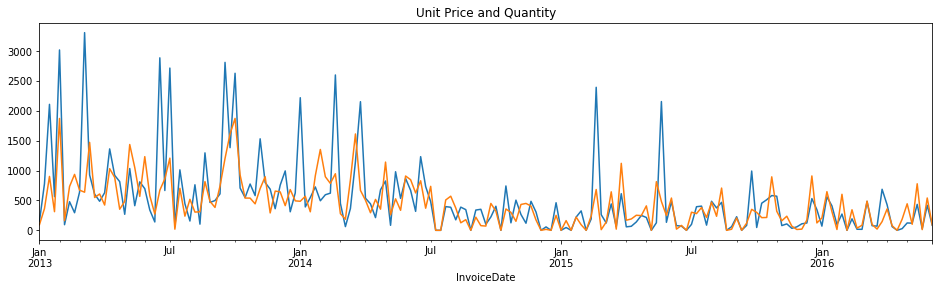

In [145]:
weekly_df['Unit Price'].plot(figsize=(16, 4), title='Unit Price and Quantity')
weekly_df['Quantity'].plot(figsize=(16, 4))
plt.show()